# Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
import librosa.feature
import librosa.onset
import IPython.display as ipd

from glob import glob
from itertools import cycle

Had to perform the following to get `librosa.load()` to work properly after encountering `Error 0x7e: cannot load sndfile.dll`
```sh
pip uninstall soundfile
pip install soundfile
```

# Read Data

In [39]:
audio_files = glob('../../data/personal/*.mp3')
audio_files

['../../data/personal\\charleston.mp3']

In [40]:
def extract_features(filepath, n_mels=256):

    # Load data
    waveform, sample_rate = librosa.load(filepath)

    # Generate spectrogram
    stft_data = librosa.stft(waveform)
    spectrogram = librosa.amplitude_to_db(np.abs(stft_data), ref=np.max)

    # Generate mel spectrogram
    mel_data = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=n_mels)
    mel_spectrogram = librosa.amplitude_to_db(np.abs(mel_data), ref=np.max)

    return waveform, sample_rate, spectrogram, mel_spectrogram

In [41]:
waveform, sample_rate, spectrogram, mel_spectrogram = extract_features(audio_files[0])

# Visualising the Input Data

## Waveform

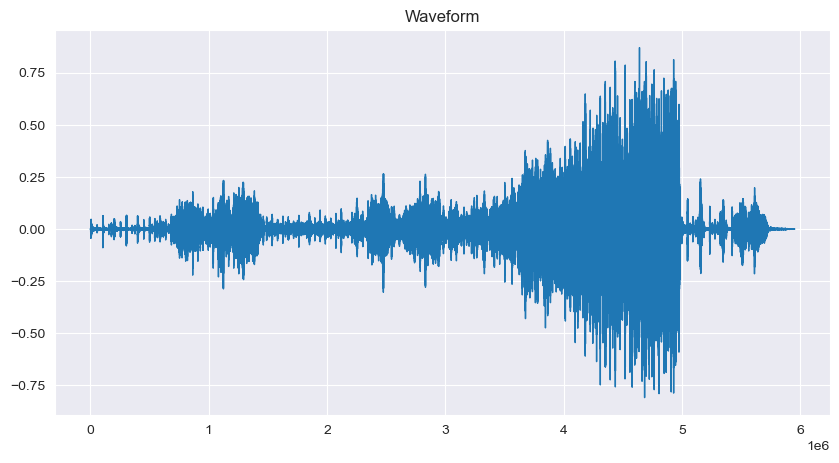

In [42]:
pd.Series(waveform).plot(figsize=(10,5), lw=1, title='Waveform')
plt.show()

## Spectrogram

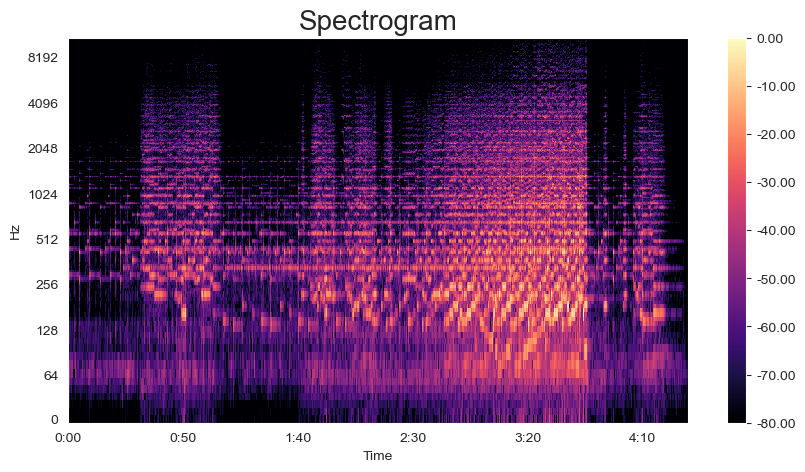

In [8]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

## Mel Spectrogram

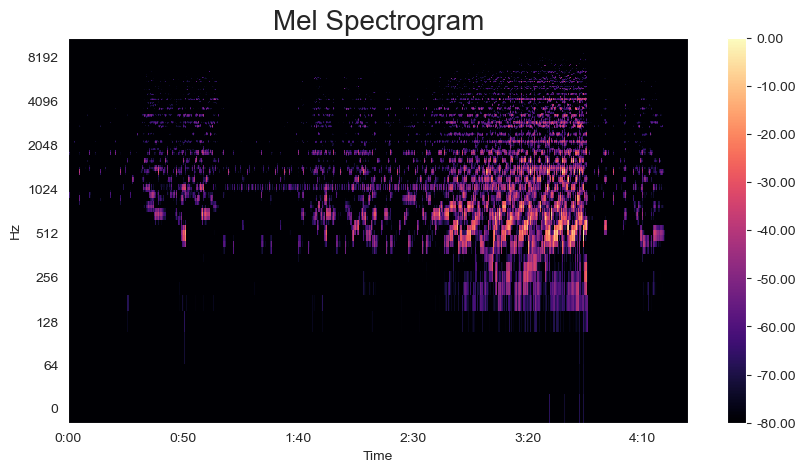

In [9]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(mel_spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

# Timbral Texture Feature Extraction

## Spectral Centroid

In [10]:
# Spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=waveform, sr=sample_rate)
spectral_centroid.mean(), spectral_centroid.var()

(1060.3919888605037, 114580.84725139075)

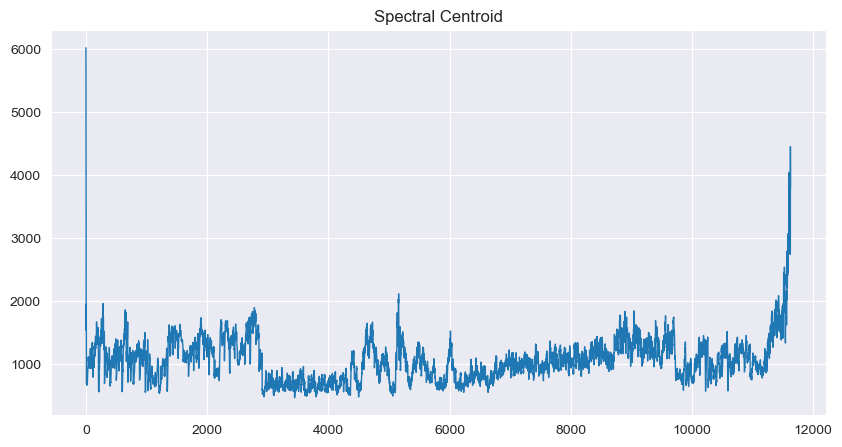

In [11]:
pd.Series(spectral_centroid[0]).plot(figsize=(10,5), lw=1, title='Spectral Centroid')
plt.show()

## Spectral Rolloff

In [12]:
# Spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate)
spectral_rolloff.mean(), spectral_rolloff.var()

(1879.6189453125, 853785.346855833)

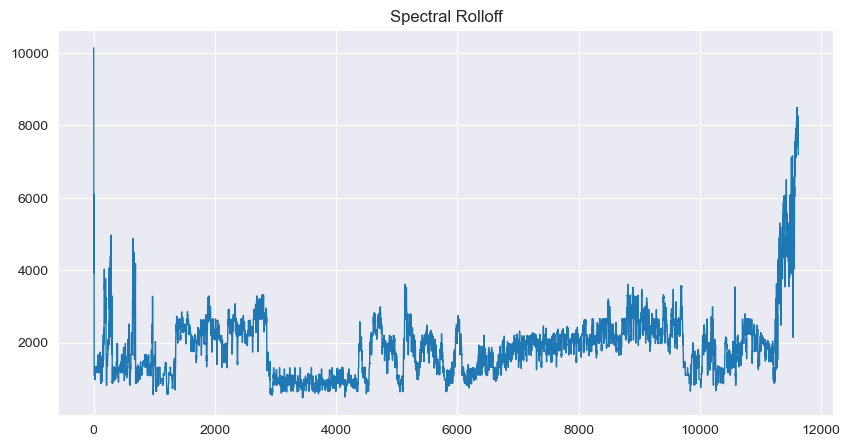

In [13]:
pd.Series(spectral_rolloff[0]).plot(figsize=(10,5), lw=1, title='Spectral Rolloff')
plt.show()

## Spectral Flux

In [14]:
# Spectral flux
# squared distance between normalised magnitudes of successive spectral distributions
spectral_flux = librosa.onset.onset_strength(y=waveform, sr=sample_rate)
spectral_flux.mean(), spectral_flux.var()

(0.68487334, 0.32169846)

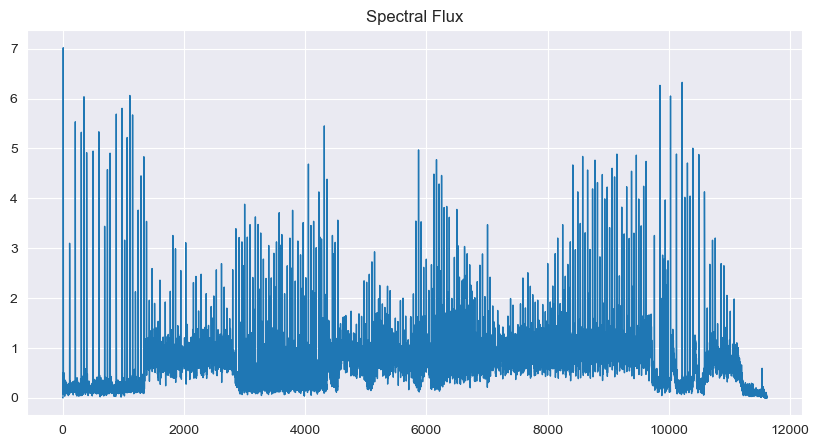

In [15]:
pd.Series(spectral_flux).plot(figsize=(10,5), lw=1, title='Spectral Flux')
plt.show()

## Time Domain Zero Crossings

In [16]:
zero_crossings = librosa.zero_crossings(y=waveform)
zero_crossings.mean(), zero_crossings.var()

(0.054524347524518235, 0.05155144305154389)

In [17]:
zero_crossings
# might not be exactly the same as Tzanetakis' implementation

array([ True, False, False, ..., False, False, False])

## MFCC Extraction

13 MFCC coefficients, and using only the first 5 excluding DC component

In [18]:
cepstral_coefficients = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13)
cepstral_coefficients_df = pd.DataFrame(cepstral_coefficients[1:6]).transpose()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

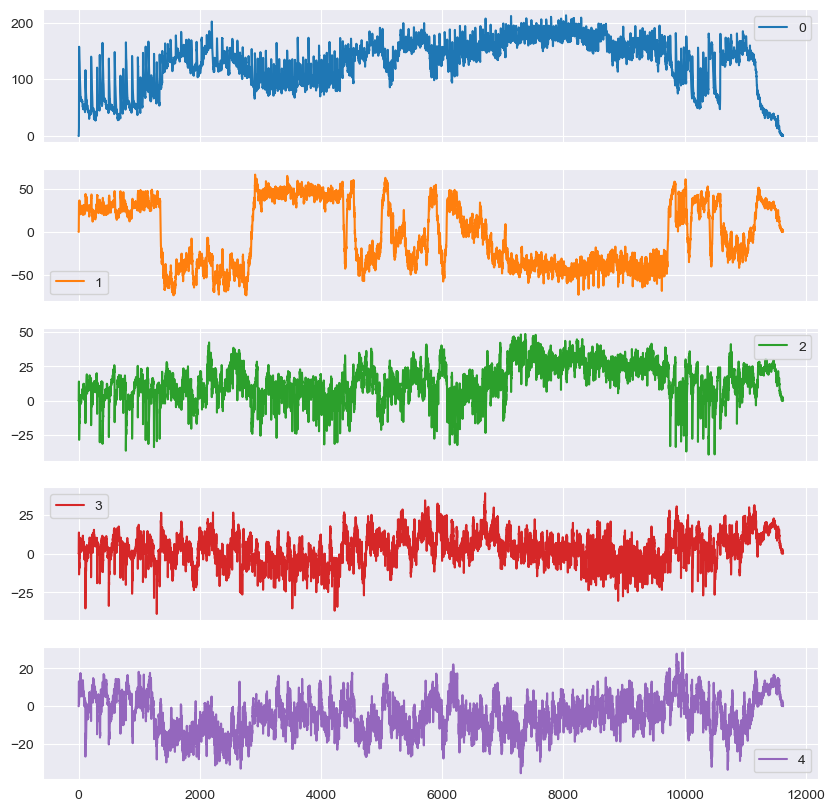

In [19]:
cepstral_coefficients_df.plot(subplots=True, figsize=(10,10))

In [20]:
cepstral_coefficients_df.mean()

0    127.830612
1     -3.648712
2     13.682080
3      3.240663
4     -4.461694
dtype: float32

In [21]:
cepstral_coefficients_df.var()

0    1819.759277
1    1350.306030
2     164.404343
3      94.212761
4      93.320847
dtype: float32

# Chord Trajectory

In [22]:
# CQT used for harmonic content over STFT for rhythmic content
chroma_cqt = librosa.feature.chroma_cqt(y=waveform, sr=sample_rate)
chroma_cqt

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.6293942 , 0.6441818 , 0.6618346 , ..., 0.85164505, 0.8811403 ,
        0.91089374],
       [0.4709592 , 0.49302763, 0.5116123 , ..., 0.45835128, 0.48631212,
        0.51805896],
       ...,
       [0.70967746, 0.6857297 , 0.67547154, ..., 0.2671847 , 0.24560238,
        0.23065819],
       [0.797575  , 0.7404258 , 0.690655  , ..., 0.3877539 , 0.35892   ,
        0.3269422 ],
       [0.52247185, 0.59181815, 0.6691519 , ..., 0.419773  , 0.38153404,
        0.35274902]], dtype=float32)

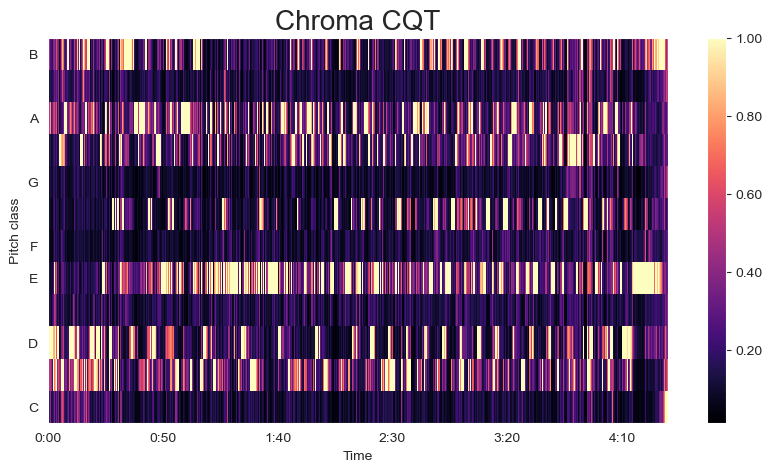

In [23]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(chroma_cqt, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

In [26]:
bpm, beat_times = librosa.beat.beat_track(y=waveform, sr=sample_rate)
beat_times

array([   10,    49,    88,   127,   166,   205,   243,   281,   319,
         357,   396,   434,   472,   510,   548,   587,   626,   665,
         704,   743,   782,   822,   862,   902,   942,   983,  1024,
        1065,  1108,  1148,  1187,  1226,  1265,  1304,  1343,  1383,
        1428,  1474,  1512,  1551,  1590,  1628,  1665,  1703,  1740,
        1776,  1818,  1861,  1903,  1944,  1987,  2030,  2070,  2110,
        2156,  2199,  2243,  2284,  2323,  2364,  2406,  2448,  2493,
        2535,  2577,  2616,  2656,  2695,  2732,  2768,  2805,  2845,
        2885,  2925,  2965,  3005,  3045,  3085,  3125,  3165,  3205,
        3245,  3285,  3325,  3365,  3405,  3445,  3485,  3525,  3565,
        3605,  3646,  3687,  3728,  3769,  3810,  3851,  3892,  3933,
        3974,  4015,  4056,  4097,  4138,  4179,  4220,  4261,  4302,
        4343,  4385,  4423,  4462,  4501,  4540,  4579,  4617,  4655,
        4691,  4734,  4776,  4815,  4855,  4894,  4933,  4973,  5012,
        5052,  5092,

In [27]:
# np.max to get most prominent notes
chroma_sync = librosa.util.sync(chroma_cqt, beat_times, aggregate=np.max)
chroma_sync

array([[1.        , 0.4157687 , 0.41031268, ..., 0.27600402, 0.18852022,
        1.        ],
       [1.        , 1.        , 0.50911367, ..., 0.22426161, 0.38806295,
        1.        ],
       [0.97679013, 1.        , 1.        , ..., 0.19913895, 0.16405185,
        1.        ],
       ...,
       [1.        , 0.8033176 , 0.73929214, ..., 1.        , 0.7347422 ,
        1.        ],
       [0.797575  , 0.20498642, 0.17955823, ..., 0.4138559 , 0.279839  ,
        0.61831427],
       [0.87680143, 0.46829736, 0.2787239 , ..., 0.9683146 , 1.        ,
        1.        ]], dtype=float32)

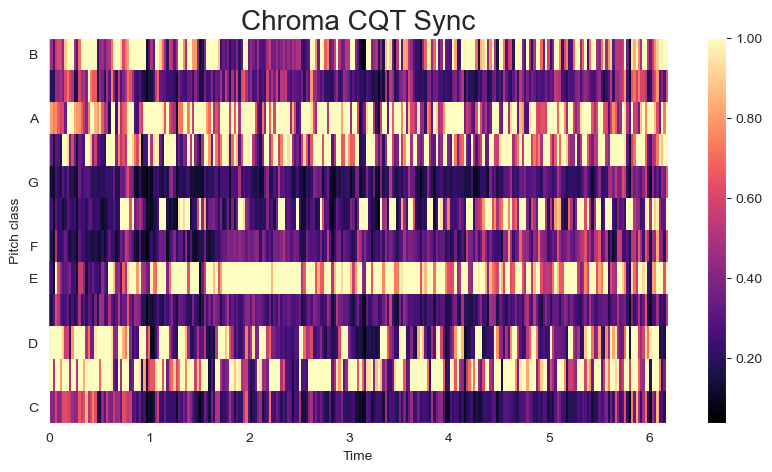

In [28]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(chroma_sync, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT Sync', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

In [36]:
tonnetz = librosa.feature.tonnetz(sr=sample_rate, chroma=chroma_sync)
tonnetz

array([[ 0.04545007,  0.18536752,  0.26502242, ...,  0.1685387 ,
         0.091625  ,  0.07816868],
       [ 0.02126293, -0.09969094,  0.0698665 , ..., -0.15250344,
        -0.26288831, -0.07742925],
       [-0.07532196, -0.23079693, -0.15916397, ...,  0.00213293,
         0.04722776, -0.04485427],
       [-0.01569817, -0.09223915, -0.15656235, ...,  0.19220486,
         0.19610737,  0.03660395],
       [-0.01811071, -0.03200221, -0.0619636 , ..., -0.02534697,
        -0.05439853, -0.01538392],
       [-0.00743191, -0.01270189,  0.04275645, ..., -0.03339634,
        -0.05202272,  0.00325427]])

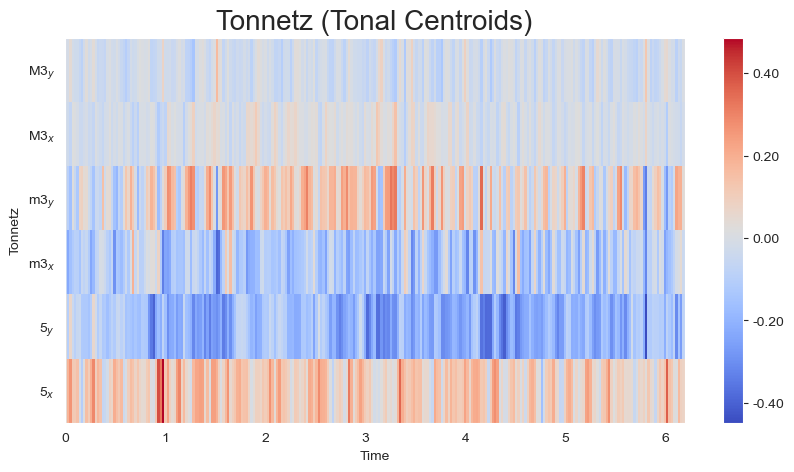

In [37]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(tonnetz, x_axis='time', y_axis='tonnetz', ax=ax)
ax.set_title('Tonnetz (Tonal Centroids)', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()